In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### Reading Data

In [2]:
sales = pd.read_excel('Data_Science_Assignment.xlsx',sheet_name='Customer_Data',skiprows=2,index_col=1)

#Skiprows=2 -- First row is empty, second row is grouping the columns
#index_col=1 -- Customer_ID is column 1 which can act as our index

sales.head()

,Unnamed: 0,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
Customer ID,,,,,,,,,,,,,,,
IND000001,NaN,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
IND000002,NaN,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
IND000003,NaN,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
IND000004,NaN,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
IND000005,NaN,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44


In [3]:
sales.columns

Index(['Unnamed: 0', 'Title', 'Specialty Code', 'Specialty Description',
       'State', 'Region', 'Call Attempts', 'Calls Successfully Completed',
       'Emails Sent', 'Emails Opened', 'Faxes Sent',
       'Brand 1 Sales (Company's Brand)', 'Brand 2 Sales (Competitor Brand)',
       'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')

In [4]:
#Unnamed: 0 is a null column as our first column in data is empty.

sales.drop('Unnamed: 0',axis=1,inplace=True)
sales.columns

Index(['Title', 'Specialty Code', 'Specialty Description', 'State', 'Region',
       'Call Attempts', 'Calls Successfully Completed', 'Emails Sent',
       'Emails Opened', 'Faxes Sent', 'Brand 1 Sales (Company's Brand)',
       'Brand 2 Sales (Competitor Brand)', 'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')

### Descriptive Analysis

In [5]:
sales.shape

(77641, 14)

In [6]:
sales.isnull().sum()

Title                                           0
Specialty Code                                  0
Specialty Description                           0
State                                           0
Region                                       1361
Call Attempts                                   0
Calls Successfully Completed                    0
Emails Sent                                     0
Emails Opened                                   0
Faxes Sent                                      0
Brand 1 Sales (Company's Brand)                52
Brand 2 Sales (Competitor Brand)            43795
Total Branded Market Sales                      0
Total Market (Branded + Unbranded) Sales        0
dtype: int64

In [7]:
sales.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,77641,56,MD,58798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specialty Code,77641,139,FM,28502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specialty Description,77641,119,FAMILY MEDICINE,28511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,77641,55,CA,6413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,76280,4,South Region,29112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call Attempts,77641,NaN,NaN,NaN,2.4971,1.70659,0,1,2,4,5
Calls Successfully Completed,77641,NaN,NaN,NaN,1.41244,1.52481,0,0,1,2,5
Emails Sent,77641,NaN,NaN,NaN,9.98515,6.02663,0,5,10,15,20
Emails Opened,77641,NaN,NaN,NaN,5.94173,5.56103,0,0,5,10,20
Faxes Sent,77641,NaN,NaN,NaN,5.50864,2.87154,1,3,6,8,10


In [8]:
33846/77641

0.4359294702541183

### Exploratory Data Analysis

In [9]:
#Considering Region

In [10]:
sales.Region.value_counts()

South Region        29112
Midwest Region      18201
Northeast Region    15566
West Region         13401
Name: Region, dtype: int64

In [11]:
#Trying to impute the values from state

state_wise_region = sales.groupby(['State']).Region.value_counts()

In [12]:
sales[sales['Region'].isnull()].State.value_counts()

PR    1273
DC      82
AE       3
AP       2
VI       1
Name: State, dtype: int64

In [13]:
print(sales[sales['State']=='PR'].State.value_counts())
print(sales[sales['State']=='DC'].State.value_counts())
print(sales[sales['State']=='AE'].State.value_counts())
print(sales[sales['State']=='AP'].State.value_counts())
print(sales[sales['State']=='VI'].State.value_counts())

PR    1273
Name: State, dtype: int64
DC    82
Name: State, dtype: int64
AE    3
Name: State, dtype: int64
AP    2
Name: State, dtype: int64
VI    1
Name: State, dtype: int64


In [14]:
#But, all the states with Region null value have no region at all.

In [15]:
sales[sales['Region'].isnull()]['Specialty Code'].value_counts()

IM     380
GP     271
UNK    245
FM     188
CD     122
END     36
NEP     18
PD       9
OBG      8
IMG      8
ID       7
EM       7
N        6
IC       5
FPG      5
OM       5
GS       4
P        4
OS       3
GE       3
NM       2
AN       2
GPM      2
PM       2
PUD      2
PDE      1
U        1
GYN      1
AHF      1
CN       1
PRO      1
DR       1
VS       1
PHP      1
MEM      1
OPH      1
ICE      1
RHU      1
PCC      1
ORS      1
RO       1
HEM      1
Name: Specialty Code, dtype: int64

In [16]:
sales.groupby(['Specialty Code']).Region.value_counts()

Specialty Code  Region          
A               South Region           2
                West Region            1
ADL             South Region           2
                Midwest Region         1
                Northeast Region       1
ADM             South Region           3
                Midwest Region         1
ADP             South Region           2
AHF             Northeast Region       3
                Midwest Region         1
                West Region            1
AI              West Region           11
                Midwest Region         9
                Northeast Region       8
                South Region           8
AM              South Region           4
                West Region            1
AMI             Northeast Region       3
                South Region           2
                Midwest Region         1
AN              South Region          15
                Northeast Region      10
                West Region            7
                Midwest 

In [17]:
#We can impute region with respect to Specialty code

In [18]:
sales.sort_values(by=['Specialty Code'],inplace=True)

In [19]:
sales.Region.fillna(method='ffill',inplace=True)

In [20]:
sales.isnull().sum()

Title                                           0
Specialty Code                                  0
Specialty Description                           0
State                                           0
Region                                          0
Call Attempts                                   0
Calls Successfully Completed                    0
Emails Sent                                     0
Emails Opened                                   0
Faxes Sent                                      0
Brand 1 Sales (Company's Brand)                52
Brand 2 Sales (Competitor Brand)            43795
Total Branded Market Sales                      0
Total Market (Branded + Unbranded) Sales        0
dtype: int64

In [21]:
#Business Problem is as below.
#Build a predictive model that estimates the impact of each channel (i.e. Calls, Emails, Faxes) 
#on Brand 1 sales, for different customer segments based on total market sales(Column P)

#Therefore, null values in Brand 2 need not be considered.
original = sales.copy() #Duplicating
sales.drop('Brand 2 Sales (Competitor Brand)',axis=1,inplace=True)

In [22]:
sales.isnull().sum()

Title                                        0
Specialty Code                               0
Specialty Description                        0
State                                        0
Region                                       0
Call Attempts                                0
Calls Successfully Completed                 0
Emails Sent                                  0
Emails Opened                                0
Faxes Sent                                   0
Brand 1 Sales (Company's Brand)             52
Total Branded Market Sales                   0
Total Market (Branded + Unbranded) Sales     0
dtype: int64

In [23]:
52/sales.shape[0]

0.0006697492304323747

In [24]:
#Null values is our data is very minimal compared to the size of data. - 0.06%.

#Hence, we drop these null values

In [25]:
#As there are no null values with respect to other columns

sales.dropna(inplace=True)

In [26]:
sales.shape

(77589, 13)

### EDA - Visualization

In [27]:
final = sales.copy()

In [28]:
final.sort_index(inplace=True)

In [29]:
final.head()

,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
Customer ID,,,,,,,,,,,,,
IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,27,131
IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,40,56
IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,27,161
IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,39,180
IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,14,44


In [30]:
final.Title.value_counts()
final['Specialty Code'].value_counts()
final['Specialty Description'].value_counts()
final['State'].value_counts()
print('All the above four statements gives lot number of values')

All the above four statements gives lot number of values


In [31]:
#Therfore, we will drop these columns from our final dataframe

In [32]:
final.drop(['Title', 'Specialty Code', 'Specialty Description', 'State'],axis=1,inplace=True)

In [33]:
df_final = pd.get_dummies(final)
df_final.head()

,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales,Region_Midwest Region,Region_Northeast Region,Region_South Region,Region_West Region
Customer ID,,,,,,,,,,,,
IND000001,1,0,13,6,8,8.0,27,131,0,0,1,0
IND000002,1,0,15,8,6,3.0,40,56,0,0,1,0
IND000003,2,1,4,2,6,7.0,27,161,0,0,1,0
IND000004,0,0,11,9,8,9.0,39,180,0,0,1,0
IND000005,5,5,0,0,9,4.0,14,44,0,0,1,0


In [34]:
#Rearranging

df_final = df_final[['Region_Midwest Region','Region_Northeast Region',
       'Region_South Region', 'Region_West Region','Call Attempts', 'Calls Successfully Completed', 'Emails Sent',
       'Emails Opened', 'Faxes Sent', "Brand 1 Sales (Company's Brand)",
       'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales']]

In [35]:
df_final.columns

Index(['Region_Midwest Region', 'Region_Northeast Region',
       'Region_South Region', 'Region_West Region', 'Call Attempts',
       'Calls Successfully Completed', 'Emails Sent', 'Emails Opened',
       'Faxes Sent', 'Brand 1 Sales (Company's Brand)',
       'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')

In [36]:
df_final.dtypes

Region_Midwest Region                         uint8
Region_Northeast Region                       uint8
Region_South Region                           uint8
Region_West Region                            uint8
Call Attempts                                 int64
Calls Successfully Completed                  int64
Emails Sent                                   int64
Emails Opened                                 int64
Faxes Sent                                    int64
Brand 1 Sales (Company's Brand)             float64
Total Branded Market Sales                    int64
Total Market (Branded + Unbranded) Sales      int64
dtype: object

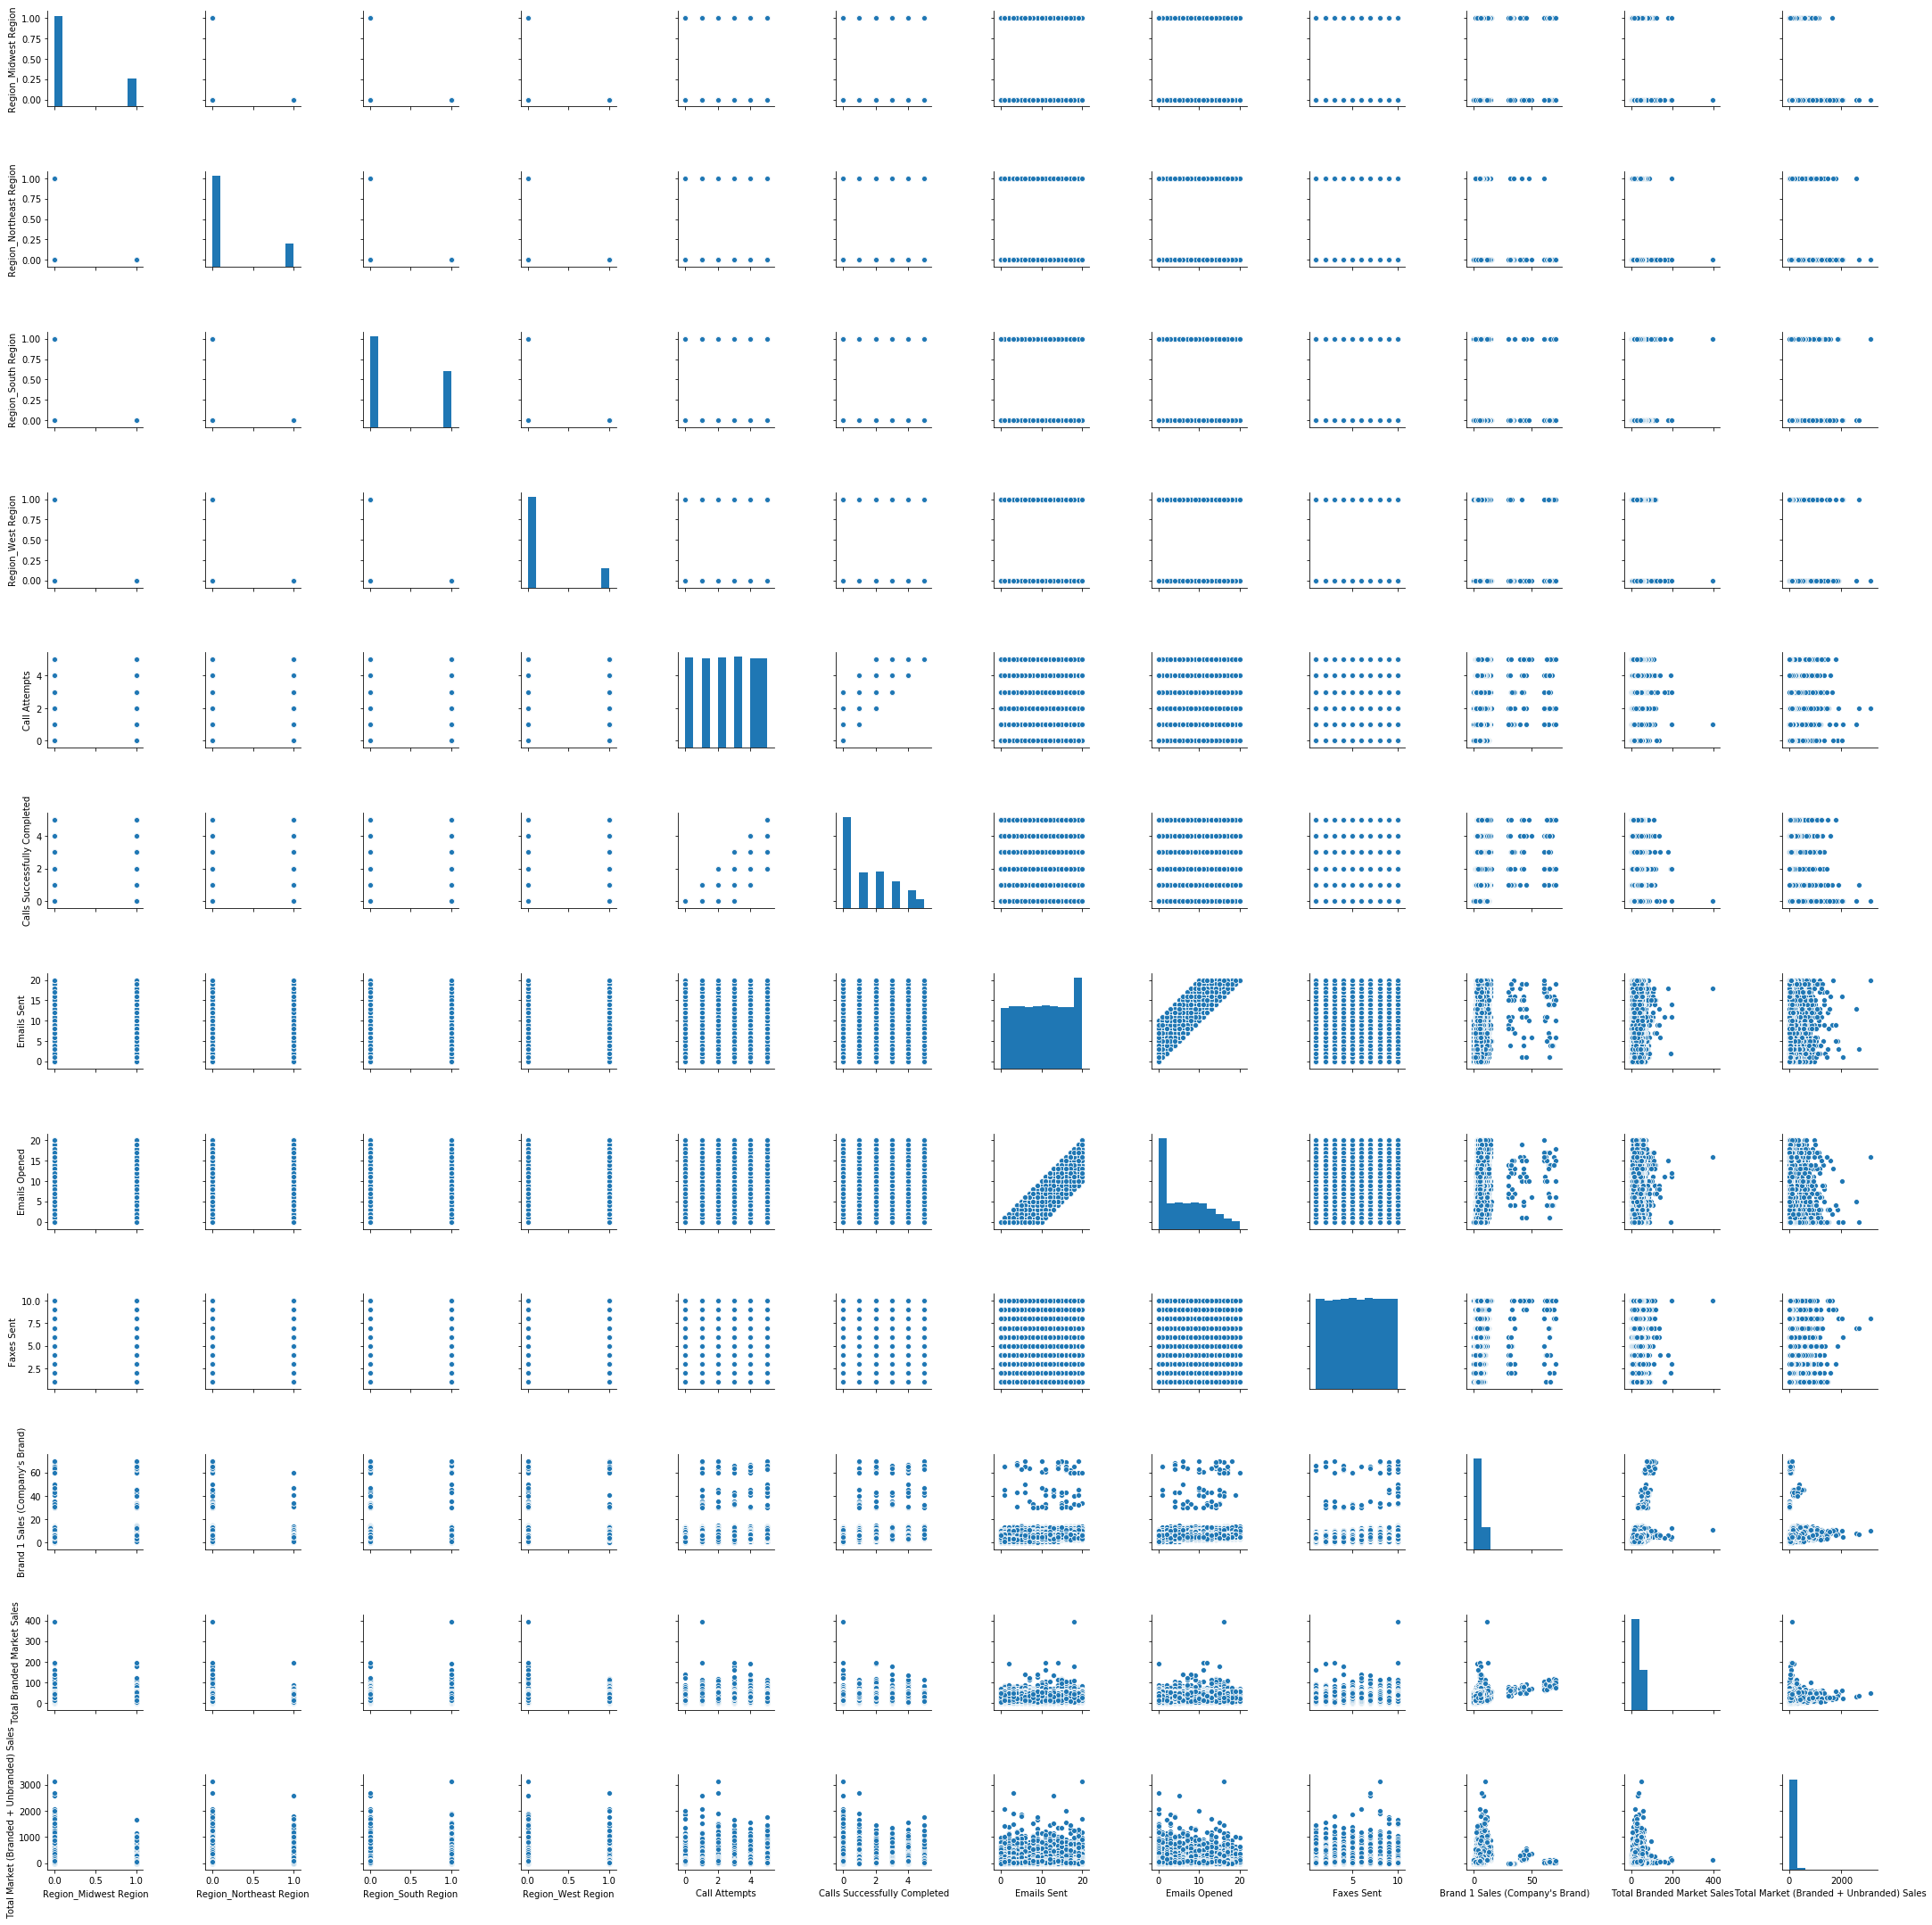

In [37]:
sns.pairplot(df_final)

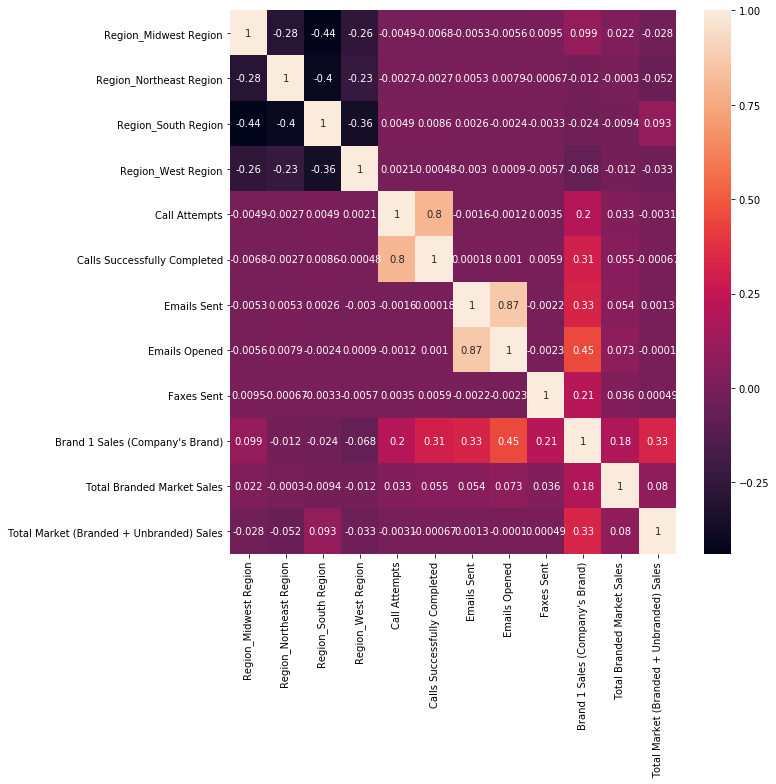

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True)

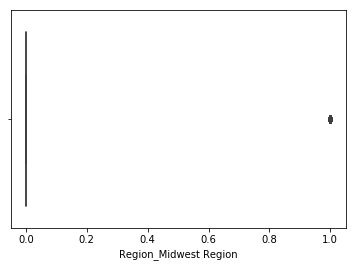

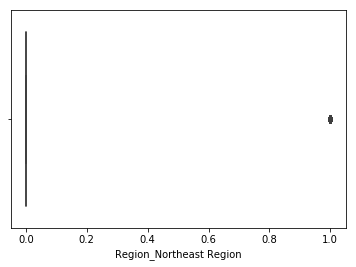

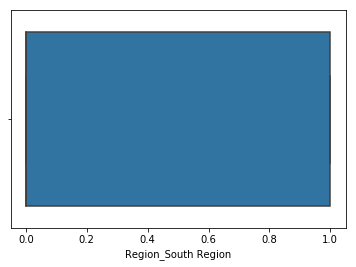

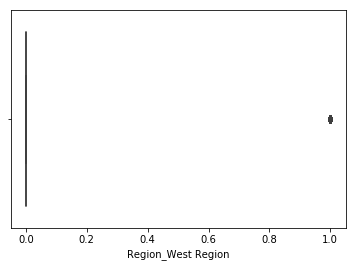

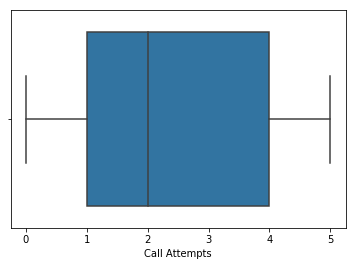

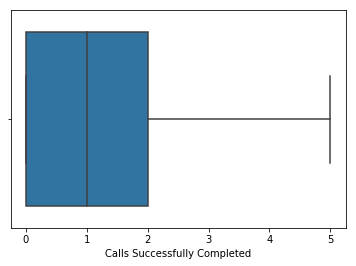

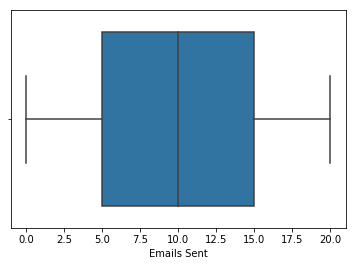

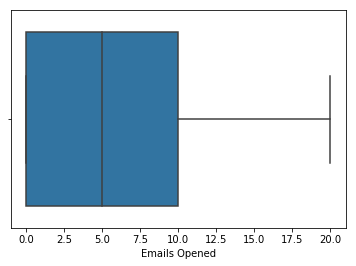

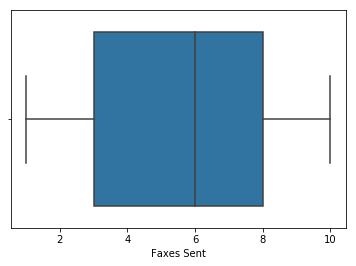

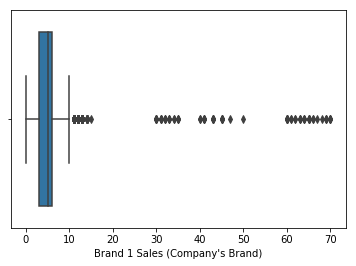

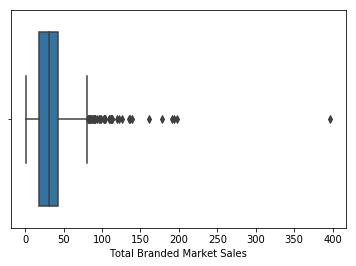

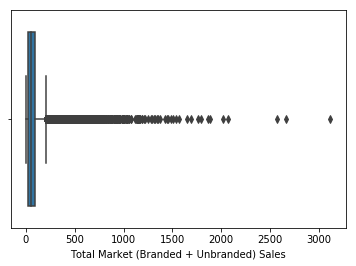

In [39]:
for i in df_final.columns:
    sns.boxplot(df_final[i])
    plt.show()

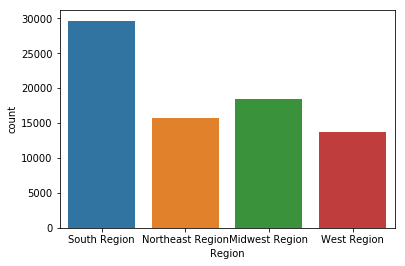

In [40]:
sns.countplot(final['Region'])

In [41]:
#FROM THE ABOVE GRAPHS, we can derive at the following conclusions.
#1. All the values have discrete nature except sales related columns
#2. Collinearity between Call attempts and Calls completed is high
#3. Collinearity between Emails sent and Emails opened is high

In [42]:
#Due to Multicollinearity,
#We will drop Call Attempts and Emails sent

df_final.drop(['Call Attempts','Emails Sent'],axis=1,inplace=True)

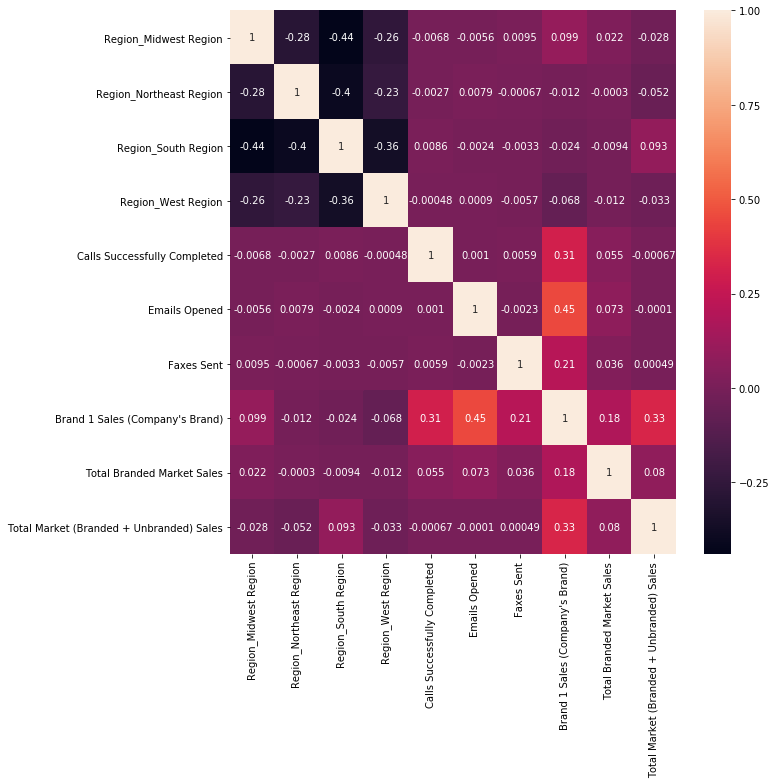

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True)

### Modelling

Linear Regression

In [44]:
calls = LinearRegression()
emails = LinearRegression()
Faxes = LinearRegression()

In [45]:
X = df_final['Calls Successfully Completed']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(np.array(x_train).reshape(-1, 1),y_train)
calls.score(np.array(x_test).reshape(-1, 1),y_test)

0.09289189013383059

In [46]:
X = df_final['Emails Opened']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
emails.fit(np.array(x_train).reshape(-1, 1),y_train)
emails.score(np.array(x_test).reshape(-1, 1),y_test)

0.21002072344351208

In [47]:
X = df_final['Faxes Sent']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
Faxes.fit(np.array(x_train).reshape(-1, 1),y_train)
Faxes.score(np.array(x_test).reshape(-1, 1),y_test)

0.04988049308080644

In [48]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.35389542774313787

In [49]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened','Total Market (Branded + Unbranded) Sales']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.4720938008209183

In [50]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened','Total Branded Market Sales','Total Market (Branded + Unbranded) Sales']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.4805561535459209

Random Forest

In [51]:
calls = RandomForestRegressor(max_depth=5)
emails = RandomForestRegressor(max_depth=5)
Faxes = RandomForestRegressor(max_depth=5)

In [52]:
X = df_final['Emails Opened']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
emails.fit(np.array(x_train).reshape(-1, 1),y_train)
emails.score(np.array(x_test).reshape(-1, 1),y_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.2361091419032031

In [53]:
X = df_final['Calls Successfully Completed']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(np.array(x_train).reshape(-1, 1),y_train)
calls.score(np.array(x_test).reshape(-1, 1),y_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.10527246960129066

In [54]:
X = df_final['Faxes Sent']
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
Faxes.fit(np.array(x_train).reshape(-1, 1),y_train)
Faxes.score(np.array(x_test).reshape(-1, 1),y_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.04979804853072711

In [55]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.3793678867407462

In [56]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened','Total Market (Branded + Unbranded) Sales']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.6450721008591476

In [57]:
X = df_final[['Calls Successfully Completed','Faxes Sent','Emails Opened','Total Branded Market Sales','Total Market (Branded + Unbranded) Sales']]
Y = df_final['Brand 1 Sales (Company\'s Brand)']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
calls.fit(x_train,y_train)
calls.score(x_test,y_test)

0.7499368439345344

In [58]:
#In case of Linear Regression, our model suffers from bias error and performs as an UNDERFIT model.
#Random Forest being ensemble technique gives a higher accuracy.

In [59]:
#We cannot perform Cross Validation as this is a regression problem

### Other Insights

In [60]:
d = original[original['Brand 2 Sales (Competitor Brand)'].isnull() == False]
d['Brand 1 or 2'] = np.where((d['Brand 1 Sales (Company\'s Brand)']>d['Brand 2 Sales (Competitor Brand)']),'B1','B2')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


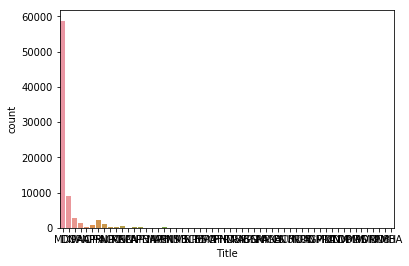

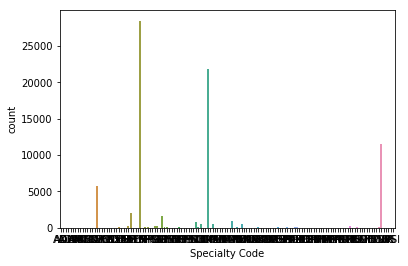

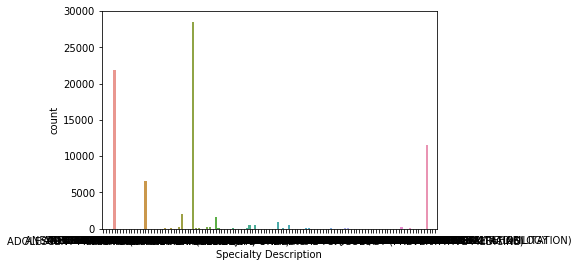

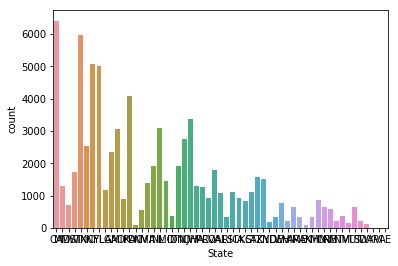

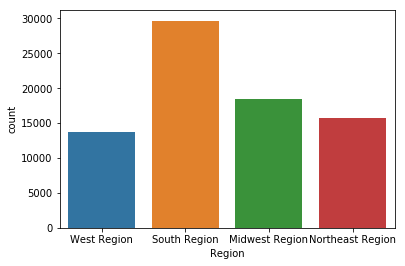

In [61]:
for i in original.columns:
    if(original[i].dtype == 'object'):
        sns.countplot(original[i])
        plt.show()

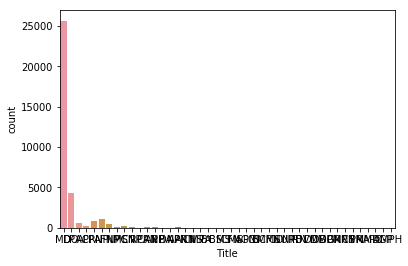

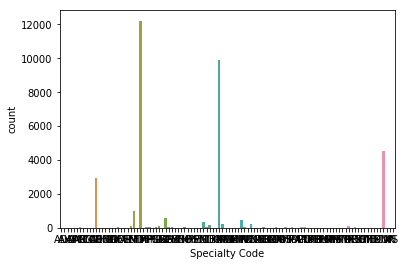

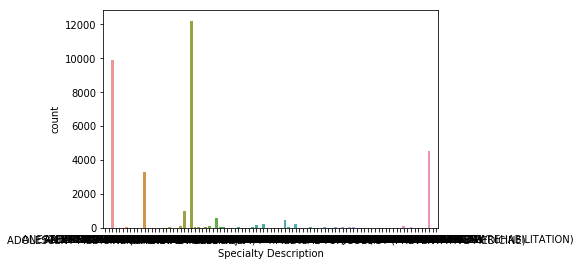

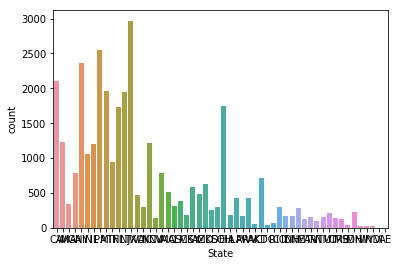

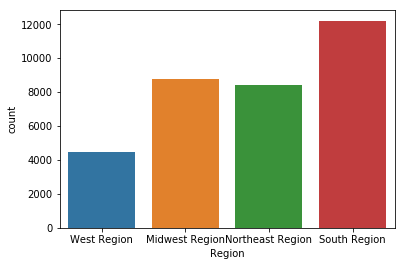

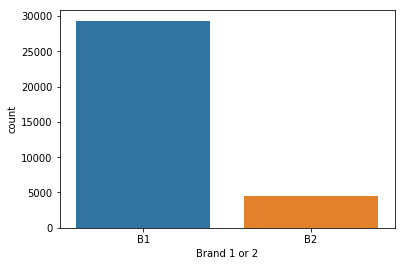

In [62]:
for i in d.columns:
    if(d[i].dtype == 'object'):
        sns.countplot(d[i])
        plt.show()

In [63]:
d['Other Brands'] = d['Total Branded Market Sales']-d['Brand 1 Sales (Company\'s Brand)']-d['Brand 2 Sales (Competitor Brand)']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
d['Unbranded'] = d['Total Market (Branded + Unbranded) Sales']-d['Total Branded Market Sales']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
#Analysis is done on dataframe 'd', because, it has small data that has competitor's data as well

In [72]:
d['Other Brands'].mean()

25.050087223914137

In [73]:
d['Brand 1 Sales (Company\'s Brand)'].mean()

4.949676236657698

In [74]:
d['Brand 2 Sales (Competitor Brand)'].mean()

1.658718903267742

In [75]:
d['Total Branded Market Sales'].mean()

31.655675707616854

In [76]:
d['Unbranded'].mean()

54.17940081545825

## Conclusion